# Demo Week 12 - Supervised Machine Learning for Label Prediction

## Demo: Image Classification

The following uses the built-in example dataset of scikit learn for optical recognition of handwritten digits dataset.

(https://scikit-learn.org/stable/datasets/index.html)


In [1]:
import sklearn.datasets as ds
import sklearn.model_selection as ms 
import sklearn.neighbors as nb 

digits = ds.load_digits()
print(digits.data.shape)
#digits

(1797, 64)


In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

Let's have a look of what is in this dataset: 
 - .images[] 8x8 pixel grayscale images of handwritten digits, and 
 - .target[] the corresponding known image labels.

<Figure size 432x288 with 0 Axes>

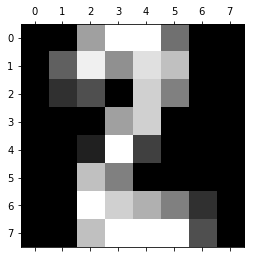

2


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[340]) 
plt.show() 
print(digits.target[340])

As a first step to train a classifier for images of hand-written digits, we need to split our dataset into a training and a testing set; we use 25% of the data for the test dataset. 

In [8]:
import sklearn.model_selection as ms 
import sklearn.neighbors as nb 

# Split data into train and test subsets
x = digits.data
y = digits.target
(X_train, X_test, y_train, y_test) = ms.train_test_split(x, y, test_size=.25) 

X_train

array([[ 0.,  0.,  7., ...,  8.,  0.,  0.],
       [ 0.,  0.,  3., ..., 14.,  7.,  0.],
       [ 0.,  0., 10., ..., 15.,  4.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  2., 15., ..., 16., 11.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [9]:
y_train

array([5, 6, 3, ..., 7, 2, 6])

Next we train a k-neighors-neighbor classifier using the training dataset.

In [10]:
kn_classifier = nb.KNeighborsClassifier() 
kn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
predicted = kn_classifier.predict(X_test)
predicted

array([8, 3, 2, 6, 1, 9, 7, 6, 2, 4, 2, 5, 9, 0, 2, 9, 2, 0, 7, 6, 6, 7,
       4, 0, 9, 8, 1, 5, 9, 3, 2, 9, 5, 1, 9, 8, 3, 9, 6, 3, 0, 2, 7, 2,
       1, 9, 7, 5, 5, 2, 6, 2, 3, 0, 2, 4, 1, 9, 0, 0, 9, 3, 8, 1, 2, 1,
       7, 8, 1, 4, 0, 6, 4, 6, 7, 3, 6, 0, 1, 2, 7, 2, 7, 0, 1, 2, 5, 1,
       0, 6, 4, 3, 8, 0, 7, 8, 9, 4, 9, 2, 8, 5, 0, 4, 7, 0, 7, 3, 8, 4,
       7, 3, 7, 3, 1, 9, 4, 5, 3, 9, 4, 8, 5, 3, 3, 4, 3, 3, 8, 5, 6, 1,
       6, 8, 6, 5, 6, 7, 3, 2, 1, 3, 0, 8, 7, 3, 5, 2, 3, 2, 9, 6, 8, 8,
       4, 5, 0, 2, 1, 1, 5, 6, 7, 1, 7, 4, 1, 6, 7, 7, 6, 6, 0, 9, 7, 4,
       7, 6, 5, 6, 4, 9, 4, 3, 7, 0, 0, 2, 5, 2, 7, 3, 9, 3, 3, 7, 6, 7,
       2, 4, 1, 8, 1, 2, 6, 8, 9, 6, 3, 4, 2, 6, 3, 1, 8, 0, 5, 8, 4, 2,
       7, 4, 2, 8, 8, 5, 4, 5, 8, 1, 6, 9, 0, 6, 1, 3, 1, 2, 3, 8, 4, 9,
       4, 5, 4, 6, 1, 7, 7, 4, 5, 5, 0, 4, 8, 3, 5, 4, 7, 4, 3, 0, 2, 2,
       4, 5, 7, 7, 8, 3, 0, 3, 5, 0, 3, 0, 7, 7, 5, 4, 0, 6, 5, 5, 6, 4,
       5, 0, 1, 1, 3, 7, 2, 1, 8, 9, 2, 7, 1, 7, 3,

In [12]:
y_test

array([8, 3, 2, 6, 1, 9, 7, 6, 2, 4, 2, 5, 9, 0, 2, 5, 2, 0, 7, 6, 6, 7,
       4, 0, 9, 8, 1, 5, 9, 3, 2, 9, 5, 1, 9, 8, 3, 9, 6, 3, 0, 2, 7, 2,
       1, 9, 7, 5, 5, 2, 6, 2, 3, 0, 2, 4, 1, 9, 0, 0, 9, 3, 8, 1, 2, 1,
       7, 8, 1, 4, 0, 6, 4, 6, 7, 3, 6, 0, 1, 2, 7, 2, 7, 0, 1, 2, 5, 1,
       0, 6, 4, 3, 8, 0, 7, 8, 9, 4, 9, 2, 8, 5, 0, 4, 7, 0, 7, 3, 8, 4,
       7, 3, 7, 3, 1, 9, 4, 5, 3, 9, 4, 8, 5, 3, 3, 4, 3, 3, 8, 5, 6, 1,
       6, 8, 6, 5, 6, 7, 3, 2, 1, 3, 0, 8, 7, 3, 5, 2, 3, 2, 9, 6, 8, 8,
       4, 5, 0, 2, 1, 8, 5, 6, 7, 1, 7, 4, 1, 6, 7, 7, 6, 6, 0, 9, 7, 4,
       7, 6, 5, 6, 4, 9, 4, 3, 7, 0, 0, 2, 5, 2, 7, 3, 9, 8, 3, 7, 6, 7,
       2, 4, 1, 8, 1, 2, 6, 8, 9, 6, 3, 4, 2, 6, 3, 1, 8, 0, 5, 8, 4, 2,
       7, 4, 2, 8, 8, 5, 4, 5, 8, 1, 6, 9, 0, 6, 1, 3, 1, 2, 9, 3, 4, 9,
       4, 5, 4, 6, 1, 7, 7, 4, 5, 5, 0, 4, 8, 3, 5, 4, 7, 4, 3, 0, 2, 2,
       4, 5, 7, 7, 8, 3, 0, 3, 5, 0, 3, 0, 7, 7, 5, 4, 0, 6, 5, 5, 6, 4,
       5, 0, 1, 1, 3, 7, 2, 1, 8, 9, 2, 7, 1, 7, 9,

How well does this classifier do?

Let's check the classification_report of the scikit learn library for our trained classifier:

In [13]:
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (kn_classifier, metrics.classification_report(y_test, predicted)))


Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.98      1.00      0.99        41
           2       1.00      1.00      1.00        46
           3       0.94      0.96      0.95        51
           4       1.00      1.00      1.00        48
           5       0.98      0.98      0.98        43
           6       1.00      1.00      1.00        42
           7       0.98      1.00      0.99        60
           8       0.97      0.95      0.96        39
           9       0.97      0.93      0.95        41

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450




https://scikit-learn.org/0.20/modules/generated/sklearn.metrics.classification_report.html

# End of Demo